**Covid19 capstone - Emman**

In [19]:
pip install Prophet

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from prophet import Prophet
import sklearn

In [3]:
df= pd.read_csv('/content/covid_19_clean_complete.csv')

In [4]:
df.head()m

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df.isna().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [10]:
df.duplicated().sum()

0

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [13]:
df['Month']= df['Date'].dt.month

In [14]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,1
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,1
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,1
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,1
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,7
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,7
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,7
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,7


In [15]:
Confirmed_Month = df.groupby(["Month"])[["Confirmed", "Active","Deaths","Recovered" ]].sum().sort_values(by= "Confirmed",ascending=False).head(10).reset_index()
Confirmed_Month

,Month,Confirmed,Active,Deaths,Recovered
0,7,362895848,147591957,15709667,199594224
1,6,246525787,116232466,13309053,116984268
2,5,144990399,82503957,9609604,52876838
3,4,63391662,43136428,4311214,15944020
4,3,9002815,5960842,397601,2644372
5,2,1663437,1252893,46875,363669
6,1,38534,36807,889,838


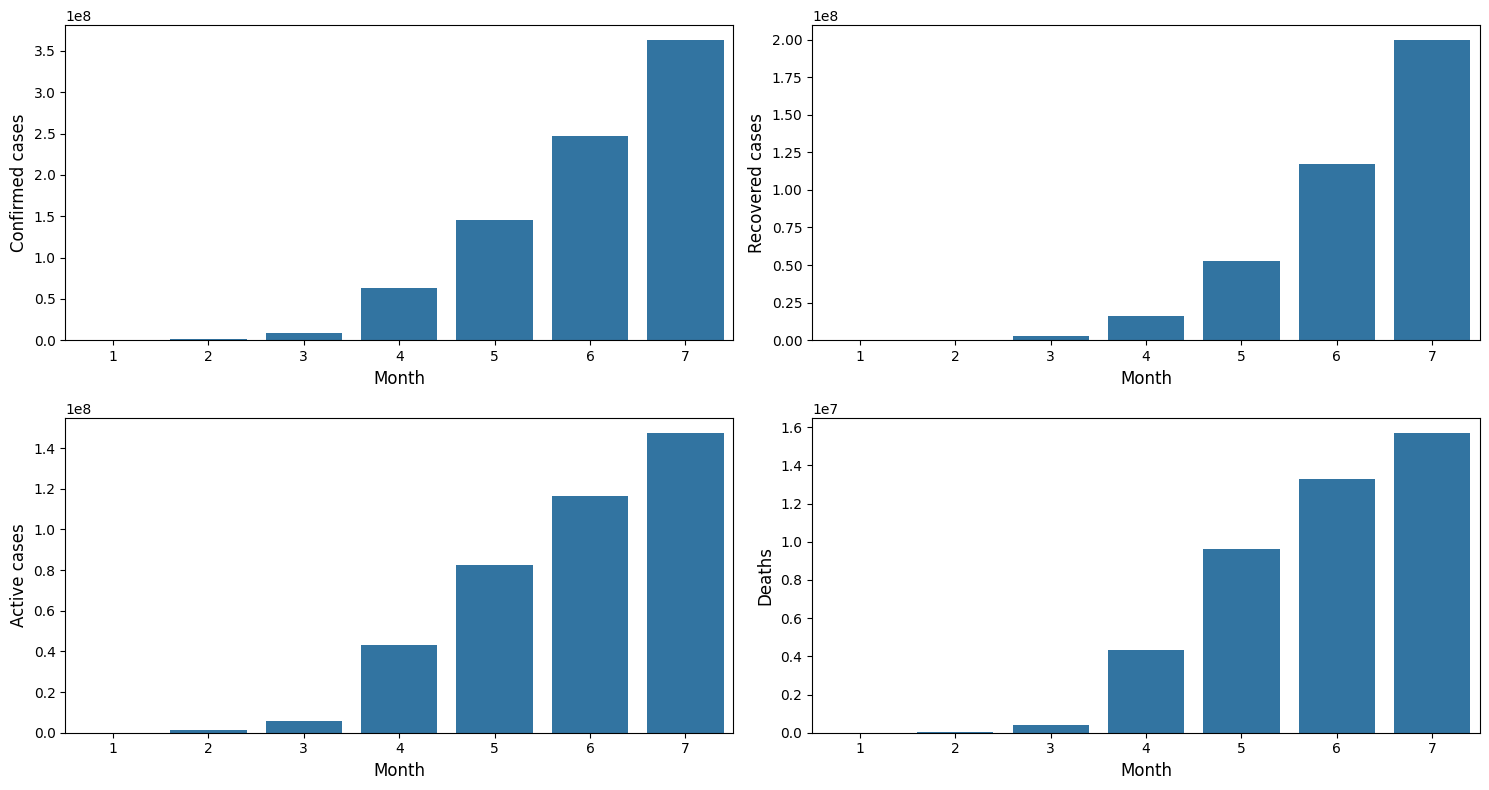

In [16]:
# Visualizing the months with different cases
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.barplot(data=Confirmed_Month, x="Month", y="Confirmed", ax=axes[0, 0])
axes[0, 0].set_xlabel("Month", fontsize=12)
axes[0, 0].set_ylabel("Confirmed cases", fontsize=12)


sns.barplot(data=Confirmed_Month, x="Month", y="Recovered", ax=axes[0, 1])
axes[0, 1].set_xlabel("Month", fontsize=12)
axes[0, 1].set_ylabel("Recovered cases", fontsize=12)


sns.barplot(data=Confirmed_Month, x="Month", y="Active", ax=axes[1, 0])
axes[1, 0].set_xlabel("Month", fontsize=12)
axes[1, 0].set_ylabel("Active cases", fontsize=12)

sns.barplot(data=Confirmed_Month, x="Month", y="Deaths", ax=axes[1, 1])
axes[1, 1].set_xlabel("Month", fontsize=12)
axes[1, 1].set_ylabel("Deaths", fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
Confirmed_10_Countries = df.groupby(["Country/Region"])[["Confirmed", "Active","Deaths","Recovered" ]].sum().sort_values(by= "Confirmed",ascending=False).head(10).reset_index()
Confirmed_10_Countries

,Country/Region,Confirmed,Active,Deaths,Recovered
0,US,224345948,156981121,11011411,56353416
1,Brazil,89524967,31094060,3938034,54492873
2,Russia,45408411,19668578,619385,25120448
3,India,40883464,15987913,1111831,23783720
4,Spain,27404045,9277432,3033030,15093583
5,United Kingdom,26748587,22624595,3997775,126217
6,Italy,26745145,7363518,3707717,15673910
7,France,21210926,10980287,3048524,7182115
8,Germany,21059152,3079991,871322,17107839
9,Iran,19339267,3114236,1024136,15200895


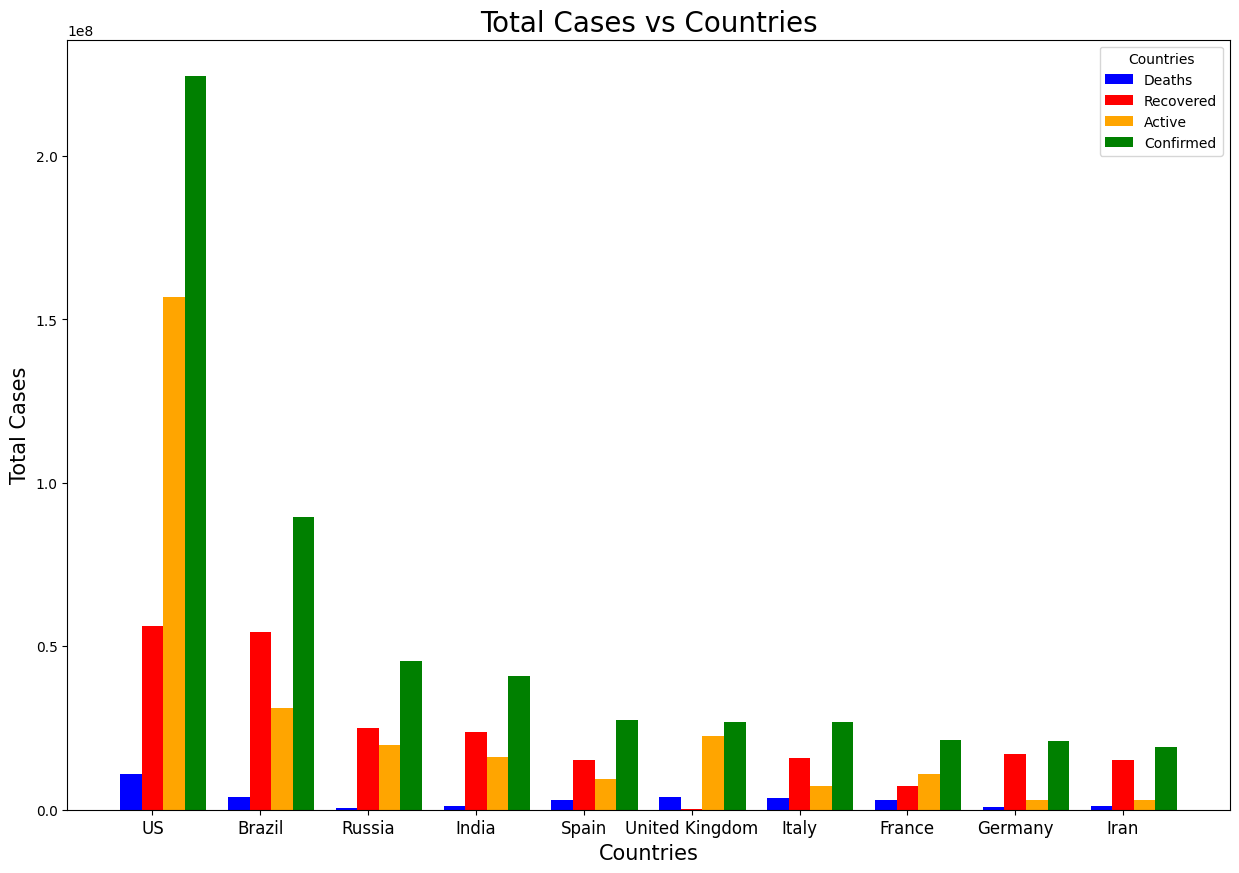

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

x= Confirmed_10_Countries['Country/Region']
y1 = Confirmed_10_Countries['Deaths']
y2 = Confirmed_10_Countries['Recovered']
y3 = Confirmed_10_Countries['Active']
y4 = Confirmed_10_Countries['Confirmed']

X_axis = np.arange(len(x))

ax.bar(X_axis -0.2, y1, 0.2, label= 'Deaths', color='blue')
ax.bar(X_axis, y2, 0.2, label= 'Recovered', color='red')
ax.bar(X_axis+0.2, y3, 0.2, label= 'Active', color='orange')
ax.bar(X_axis+0.4, y4, 0.2, label= 'Confirmed', color='green')

plt.xticks(X_axis, x ,  size = 12)
ax.set_xlabel('Countries', size = 15)
ax.set_ylabel('Total Cases', size = 15)
ax.set_title('Total Cases vs Countries', size = 20)
ax.legend(title='Countries')

plt.show()

**Uneven Global Impact:** The US stands out with a high volume of confirmed and active cases, indicating a significant burden on the healthcare system.

**Varied Recovery Rates:** While the US and Brazil have comparable overall recovery numbers, the US exhibits a lower recovery rate, suggesting potential challenges in patient care or access to resources.

**UK's Struggle:** The UK faces a concerning combination of high active cases and a low recovery rate, pointing towards an ongoing struggle to contain the virus.

**German Success:** Germany demonstrates a successful response with a high recovery rate and a low death rate, indicating effective containment and treatment strategies.

**Positive Trends:** Russia and Germany both exhibit low death rates, highlighting the potential for mitigating severe outcomes. Furthermore, Germany and Iran have low active case counts, suggesting effective control measures in limiting the spread of the virus.

In [38]:
Full = df.groupby("Country/Region")[["Confirmed","Active","Deaths","Recovered"]].sum().reset_index()
Full

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [20]:
df_1=pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])
df_1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


Prediction for Confirmed cases


In [22]:
Confirmed1 = df_1.groupby("Date").sum()["Confirmed"].reset_index()
Confirmed1

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [25]:
Confirmed1.columns = ["ds", "y"]
Confirmed1["ds"] = pd.to_datetime(Confirmed1['ds'])
Confirmed1.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [27]:
#Prophet Model
model = Prophet()
model.fit(Confirmed1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyqxch58/u8m70wy0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyqxch58/25e5d_my.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67627', 'data', 'file=/tmp/tmpdyqxch58/u8m70wy0.json', 'init=/tmp/tmpdyqxch58/25e5d_my.json', 'output', 'file=/tmp/tmpdyqxch58/prophet_modeljat8adkz/prophet_model-20241229201930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:19:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
Future = model.make_future_dataframe(periods = 10)
#Forcasting for next 10 days

In [29]:
Future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05


In [30]:
Forecast = model.predict(Future)
Forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
193,2020-08-02,1.736430e+07,1.724967e+07,1.748364e+07
194,2020-08-03,1.755889e+07,1.744553e+07,1.766922e+07
195,2020-08-04,1.774813e+07,1.763385e+07,1.786899e+07
196,2020-08-05,1.795791e+07,1.782387e+07,1.808160e+07
197,2020-08-06,1.817184e+07,1.804072e+07,1.830186e+07


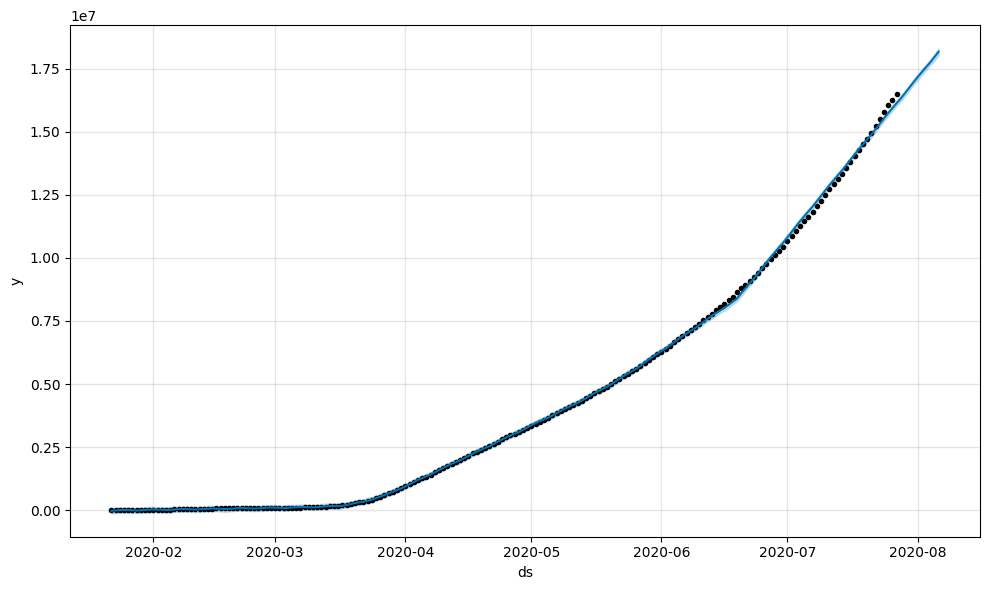

In [31]:
Confirmed1_forecasting_plot=model.plot(Forecast)

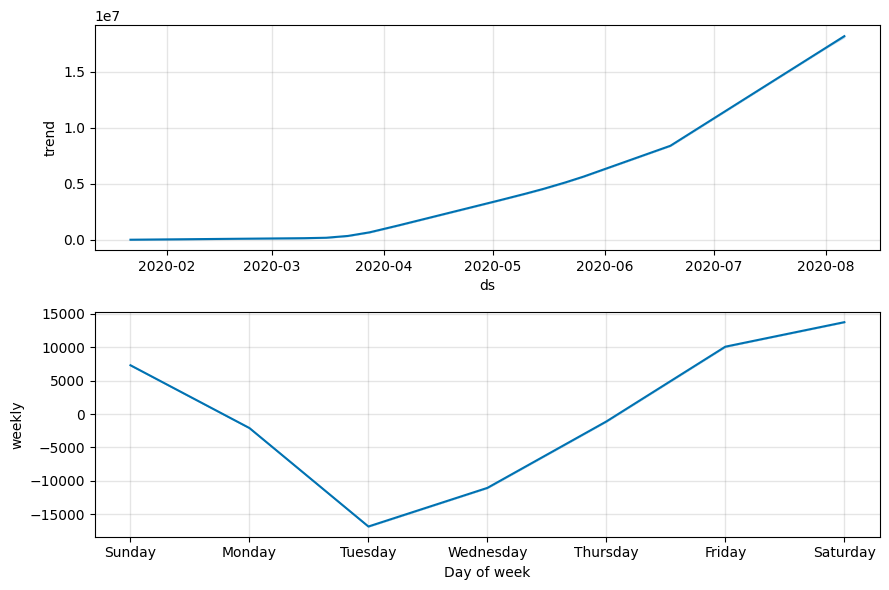

In [32]:
Confirmed1_forecasting_plot1=model.plot_components(Forecast)

Prediction for Deaths


In [33]:
Deaths1 = df_1.groupby("Date").sum()["Deaths"].reset_index()
Deaths1

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [34]:
Deaths1.columns = ["ds", "y"]
Deaths1["ds"] = pd.to_datetime(Deaths1['ds'])
Deaths1.tail()

,ds,y
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621
187,2020-07-27,654036


In [35]:
model1 = Prophet()
model1.fit(Deaths1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyqxch58/a9ko6q8r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyqxch58/sjdmhz6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87050', 'data', 'file=/tmp/tmpdyqxch58/a9ko6q8r.json', 'init=/tmp/tmpdyqxch58/sjdmhz6v.json', 'output', 'file=/tmp/tmpdyqxch58/prophet_modeldmuzp8y1/prophet_model-20241229202237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:22:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:22:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


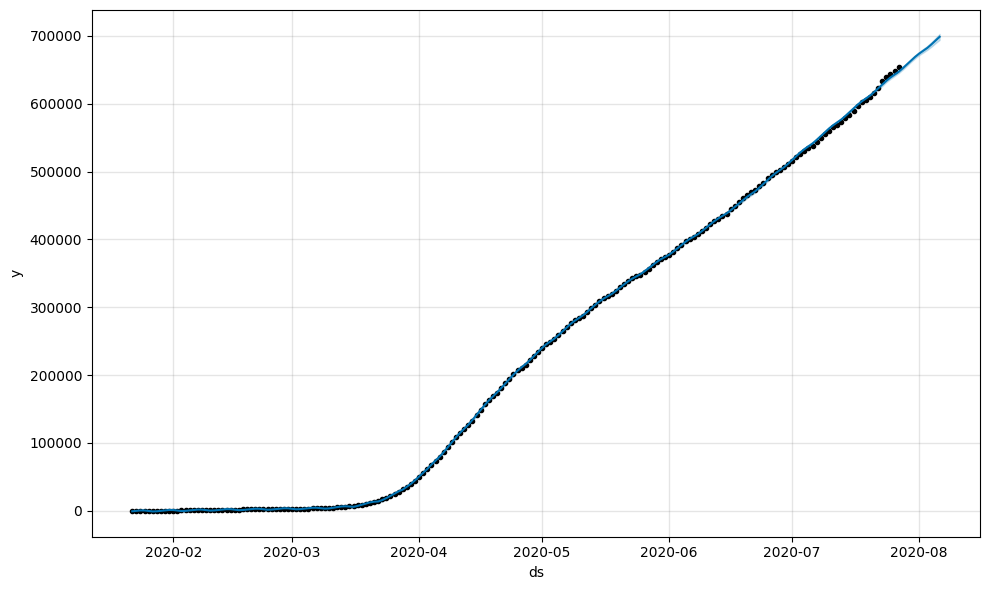

In [36]:
Future1 = model1.make_future_dataframe(periods = 10)
Forecast1 = model1.predict(Future1)
Forecast1[["ds","yhat","yhat_lower","yhat_upper"]].tail(10)
#Prediction for deaths for next 10 days
Deaths1_forecasting_plot=model1.plot(Forecast1)

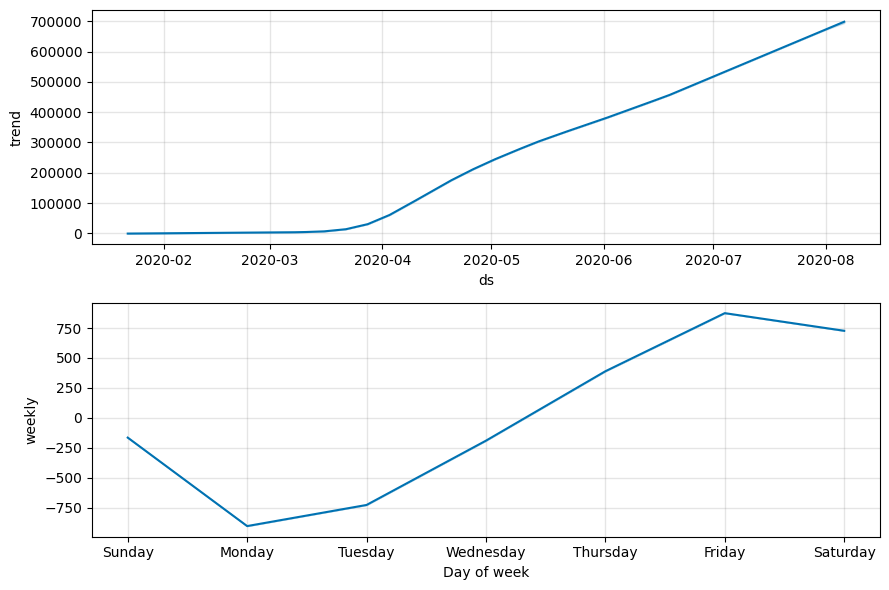

In [37]:
Deaths1_forecasting_plot1=model1.plot_components(Forecast1)

Predicting for active cases

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyqxch58/ydp8f_9k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyqxch58/jrxqhfez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66488', 'data', 'file=/tmp/tmpdyqxch58/ydp8f_9k.json', 'init=/tmp/tmpdyqxch58/jrxqhfez.json', 'output', 'file=/tmp/tmpdyqxch58/prophet_modelzffzgxxh/prophet_model-20241229202646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


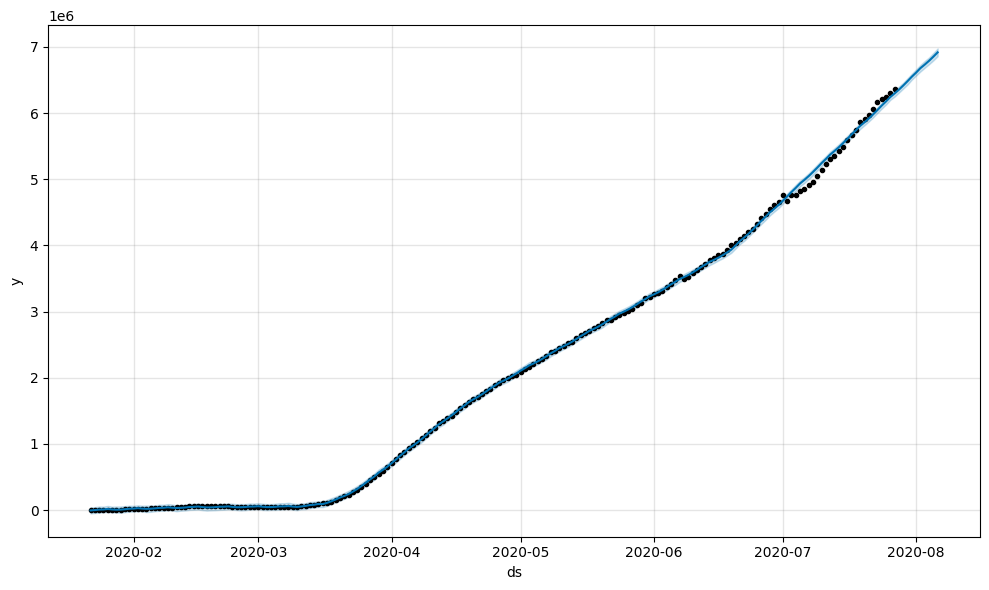

In [39]:
# Active Cases Forecasting
Active1 = df_1.groupby("Date").sum()["Active"].reset_index()
Active1.columns = ["ds", "y"]
Active1["ds"] = pd.to_datetime(Active1['ds'])

model_active = Prophet()
model_active.fit(Active1)

Future_active = model_active.make_future_dataframe(periods=10)
Forecast_active = model_active.predict(Future_active)

# Plot the forecast for Active Cases
active_forecasting_plot = model_active.plot(Forecast_active)
active_forecasting_plot.show()

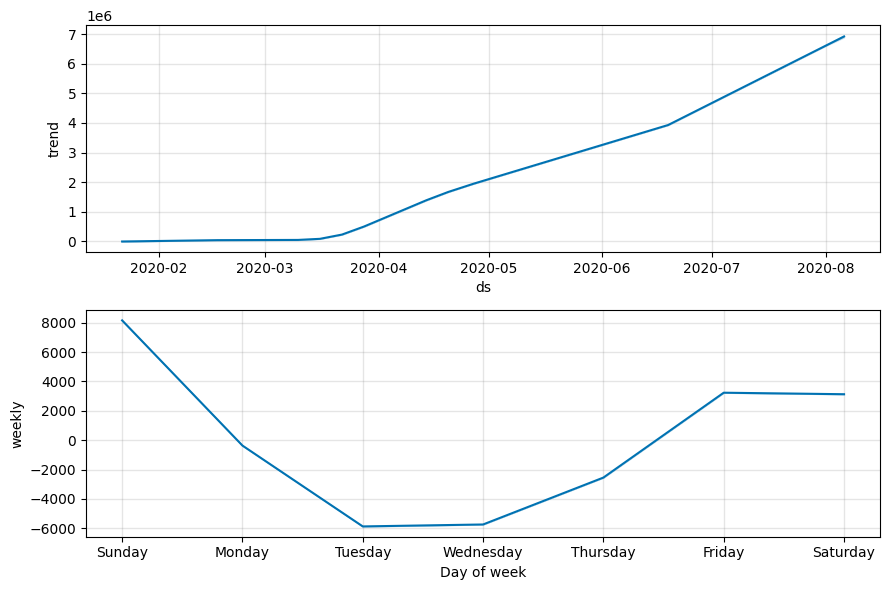

In [40]:
active_forecasting_plot=model_active.plot_components(Forecast_active)

Predicting Recovories

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyqxch58/4zer2xbo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyqxch58/kw9tlz66.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96938', 'data', 'file=/tmp/tmpdyqxch58/4zer2xbo.json', 'init=/tmp/tmpdyqxch58/kw9tlz66.json', 'output', 'file=/tmp/tmpdyqxch58/prophet_modelokwkm4p9/prophet_model-20241229203123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:31:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


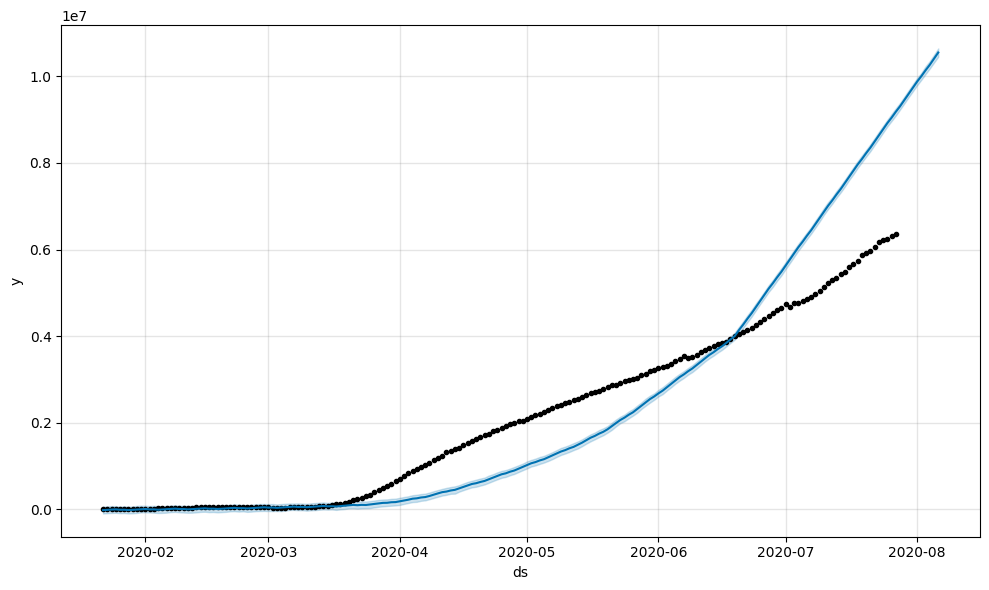

In [41]:
# Recovered Cases Forecasting
Recover = df_1.groupby("Date").sum()["Recovered"].reset_index()
Recover.columns = ["ds", "y"]
Recover["ds"] = pd.to_datetime(Recover['ds'])

model_rec = Prophet()
model_rec.fit(Recover)

Future_rec = model_rec.make_future_dataframe(periods=10)
Forecast_rec = model_rec.predict(Future_rec)

# Plot the forecast for Active Cases
rec_forecasting_plot = model_active.plot(Forecast_rec)
rec_forecasting_plot.show()